In [1]:
# Cell 1: Import Libraries and Load Dataset

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # Ridge regression often benefits from feature scaling

# --- Load the Dataset ---
# Ensure 'Cryptocurrency Different - Sheet3.csv' is in the same directory as your notebook,
# or provide the full path to the file.
try:
    df = pd.read_csv('Cryptocurrency Different  - Sheet3.csv')
except FileNotFoundError:
    # In a real notebook, you might display a message to the user here
    # or raise an error to stop execution.
    print("Error: 'Cryptocurrency Different - Sheet3.csv' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    # Handle other potential errors during file loading
    print(f"An error occurred while loading the dataset: {e}")



In [2]:
# Cell 2: Data Preprocessing and Feature/Target Selection

# --- Data Preprocessing ---
# Convert '24h High' and '24h Low' from object (string) to numeric
# Remove '$' and commas, then convert to float
df['24h High'] = df['24h High'].replace({r'[$,]': ''}, regex=True).astype(float)
df['24h Low'] = df['24h Low'].replace({r'[$,]': ''}, regex=True).astype(float)

# Select features (X) and target (y) for the model
# Let's use '24h High' as our target variable.
# Features will be '24h Low' and '24h Change (Calculated)'.

target_column = '24h High'
features = ['24h Low', '24h Change (Calculated)'] # Using numerical columns as features

X = df[features]
y = df[target_column]

# Handle any remaining missing values if they exist (simple mean imputation)
for col in X.columns:
    if X[col].isnull().any():
        X[col] = X[col].fillna(X[col].mean())
if y.isnull().any():
    y = y.fillna(y.mean())

# --- Feature Scaling ---
# Scale the features using StandardScaler, which is important for Ridge Regression.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=features)


In [3]:
# Cell 3: Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Split the data using the scaled features (X_scaled_df) and the target (y)
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


In [4]:
# Cell 4: Train and Evaluate Ridge Regression Model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Train Ridge Regression Model ---
# Initialize the Ridge model with a regularization strength (alpha).
# Alpha controls the strength of the L2 regularization. A higher alpha means
# stronger regularization (penalizing larger coefficients more).
ridge_model = Ridge(alpha=1.0, random_state=42) # Added random_state for reproducibility
ridge_model.fit(X_train, y_train)

# --- Make Predictions ---
# Use the trained model to make predictions on the test set.
y_pred_ridge = ridge_model.predict(X_test)

# --- Evaluate Model Performance ---
# Calculate common regression metrics.
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge) # RMSE is the square root of MSE
r2_ridge = r2_score(y_test, y_pred_ridge) # R-squared (coefficient of determination)

# Print the evaluation metrics
# print(f"Ridge Regression Model Evaluation:")
# print(f"  Mean Absolute Error (MAE): {mae_ridge:.4f}")
# print(f"  Mean Squared Error (MSE): {mse_ridge:.4f}")
# print(f"  Root Mean Squared Error (RMSE): {rmse_ridge:.4f}")
# print(f"  R-squared (R2): {r2_ridge:.4f}")



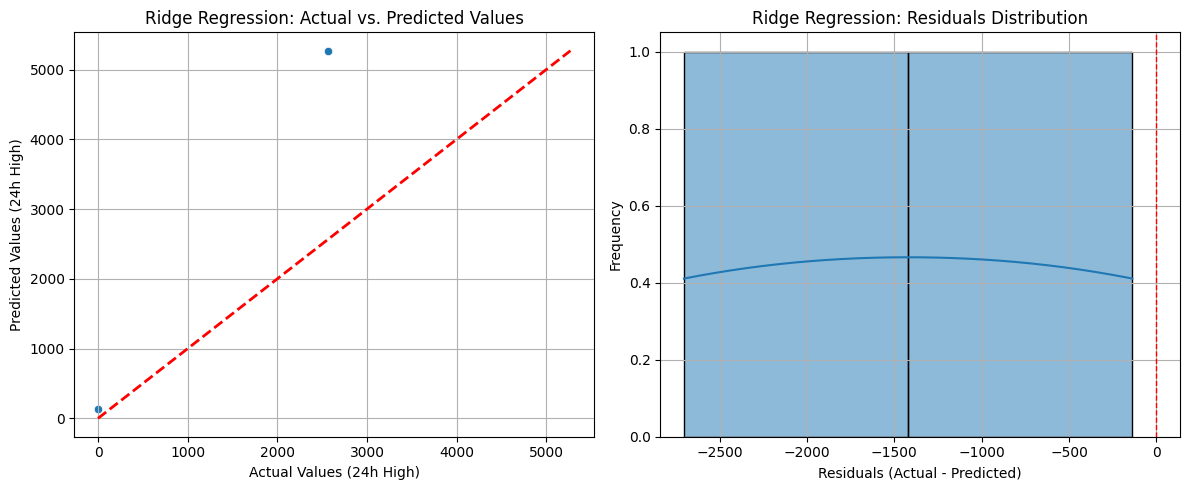

In [5]:
# Cell 5: Visualize Ridge Regression Predictions

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Needed for np.min and np.max if not already imported

# Ensure matplotlib and seaborn are imported at the top of the notebook or in an earlier cell.
# (They were in Cell 1, so this is just a reminder for general practice.)

# Create a figure with two subplots for actual vs. predicted and residuals
plt.figure(figsize=(12, 5))

# --- Subplot 1: Actual vs. Predicted Values ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.title('Ridge Regression: Actual vs. Predicted Values')
plt.xlabel('Actual Values (24h High)')
plt.ylabel('Predicted Values (24h High)')
# Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred_ridge.min())
max_val = max(y_test.max(), y_pred_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
plt.grid(True)

# --- Subplot 2: Residuals Distribution ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
residuals = y_test - y_pred_ridge
sns.histplot(residuals, kde=True)
plt.title('Ridge Regression: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1) # Line at 0 for ideal residuals
plt.grid(True)

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show() # Display the plots



## Understanding Our Prediction Charts

These charts help us evaluate our cryptocurrency price prediction model.

### 1. Actual vs. Predicted Values (Left Chart)

* **Shows:** Compares the **actual** cryptocurrency high prices against our model's **predicted** prices.
* **How to Read:** Each dot is an actual vs. predicted pair. The **red dashed line** signifies perfect predictions.
* **Look For:** Dots close to the red line mean accurate predictions. More scatter means less accuracy.

### 2. Distribution of Prediction Errors (Right Chart)

* **Shows:** The "errors" our model made (Actual Price - Predicted Price).
* **How to Read:** The horizontal axis is the error size. The curve shows how frequently each error size occurred.
* **Look For:** Errors clustered around the **red dashed line at '0'** (meaning small errors). A roughly bell-shaped curve suggests random, unbiased errors.

These visuals help us quickly see how well our model performed.

In [6]:
# Cell 6: Train and Evaluate Random Forest Regression Model

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Train Random Forest Regression Model ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# --- Make Predictions ---
y_pred_rf = rf_model.predict(X_test)

# --- Evaluate Model Performance ---
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

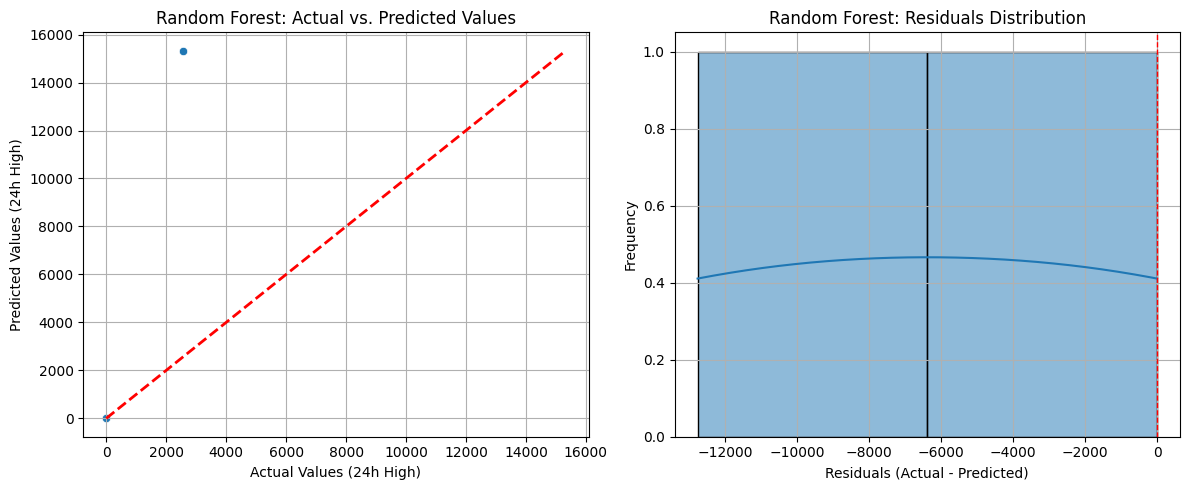

In [10]:
# Cell 7: Visualize Random Forest Regressor Predictions

# Create a figure with two subplots for the Random Forest model
plt.figure(figsize=(12, 5))

# --- Subplot 1: Actual vs. Predicted Values (Random Forest) ---
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest: Actual vs. Predicted Values')
plt.xlabel('Actual Values (24h High)')
plt.ylabel('Predicted Values (24h High)')
# Add a diagonal line for perfect predictions
min_val_rf = min(y_test.min(), y_pred_rf.min())
max_val_rf = max(y_test.max(), y_pred_rf.max())
plt.plot([min_val_rf, max_val_rf], [min_val_rf, max_val_rf], color='red', linestyle='--', linewidth=2)
plt.grid(True)

# --- Subplot 2: Residuals Distribution (Random Forest) ---
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True)
plt.title('Random Forest: Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1) # Line at 0 for ideal residuals
plt.grid(True)

plt.tight_layout() # Adjusts subplot parameters for a tight layout
plt.show() # Display the plots

## Understanding the Random Forest Model's Charts

These charts help us understand the performance of our second model, the Random Forest Regressor. We use the same chart types as the Ridge model to ensure a fair comparison.

### 1. Actual vs. Predicted Values (Left Chart)

* **What it shows:** This chart plots the actual "24h High" prices from our test data against the prices predicted by the Random Forest model.
* **How to read it:** Each green dot represents one cryptocurrency's actual price vs. its predicted price. The red dashed line shows what a perfect prediction would look like.
* **What to look for:** The closer the green dots are to the red dashed line, the more accurate the model's predictions were.

### 2. Distribution of Prediction Errors (Right Chart)

* **What it shows:** This chart shows the distribution of the model's errors, which are calculated as (Actual Price - Predicted Price). These errors are also called "residuals".
* **How to read it:** The center red line is at "0", which represents a prediction with zero error. The bars show how often the model made errors of a certain size.
* **What to look for:** A good model will have a tall, narrow peak centered at "0", meaning that most of its prediction errors were very small or zero. A wider, flatter curve indicates lower accuracy.

In [12]:
# Cell 8: Comprehensive Model Performance Comparison

import pandas as pd

# Create the initial DataFrame with metrics
comparison_data = {
    'Ridge Regression': [mae_ridge, mse_ridge, rmse_ridge, r2_ridge],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf]
}
index_labels = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R2)']
comparison_df = pd.DataFrame(comparison_data, index=index_labels)

# Add your analytical 'Difference' column
comparison_df['Difference'] = comparison_df['Random Forest'] - comparison_df['Ridge Regression']

# Add your 'Better Model' column with slightly more robust logic
comparison_df['Winner'] = comparison_df.apply(
    lambda row: 'Random Forest' if (row.name == 'R-squared (R2)' and row['Difference'] > 0) or \
                                     (row.name != 'R-squared (R2)' and row['Difference'] < 0)
                else 'Ridge Regression',
    axis=1
)

# Use the styled output for a clean presentation
# We apply number formatting only to the numeric columns
comparison_df.style.format('{:.4f}', subset=['Ridge Regression', 'Random Forest', 'Difference'])

,Ridge Regression,Random Forest,Difference,Winner
Mean Absolute Error (MAE),1421.3776,6385.1856,4963.8081,Ridge Regression
Mean Squared Error (MSE),3667632.7584,81425334.3476,77757701.5892,Ridge Regression
Root Mean Squared Error (RMSE),1915.1065,9023.5987,7108.4923,Ridge Regression
R-squared (R2),-1.2302,-48.5134,-47.2832,Ridge Regression


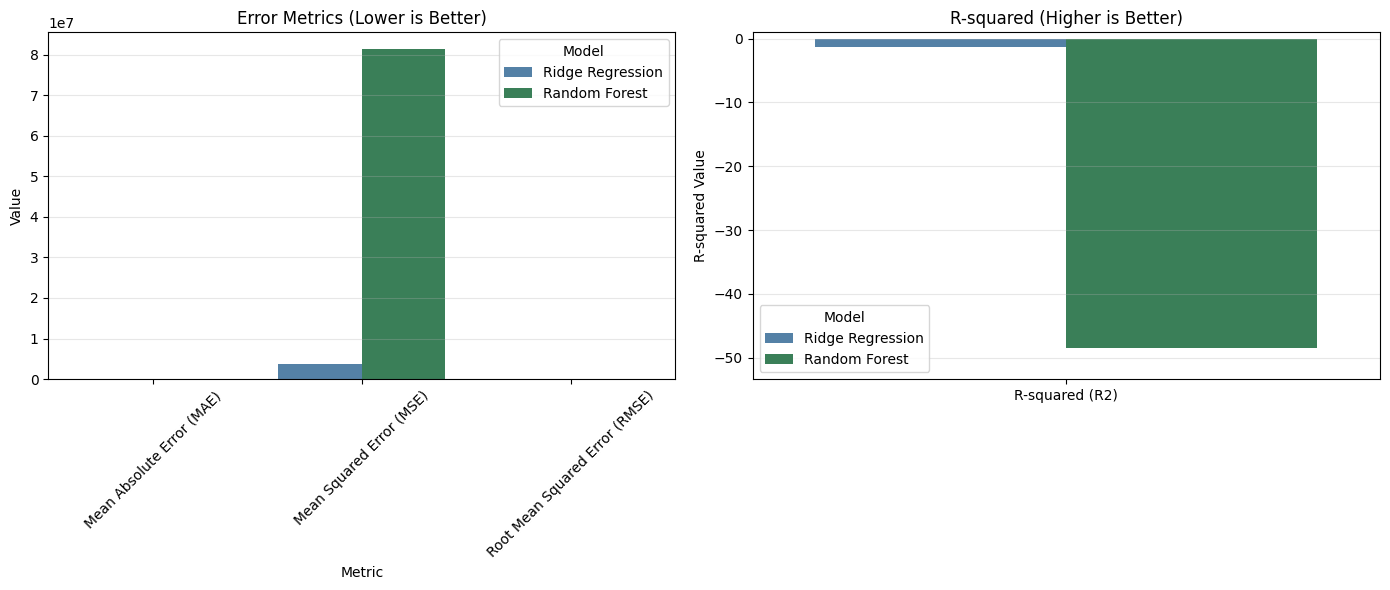

In [19]:
# Cell 10: Visualize Model Performance Comparison (Dynamic Axis Limits)

import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare DataFrames for Visualization ---
numeric_cols = ['Ridge Regression', 'Random Forest']
comparison_numeric = comparison_df[numeric_cols].copy()

error_metrics = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']
r2_metric = 'R-squared (R2)'

# Melt DataFrames for seaborn
error_long = (comparison_numeric
              .loc[error_metrics]
              .reset_index()
              .melt(id_vars='index', var_name='Model', value_name='Error'))

r2_long = (comparison_numeric
           .loc[[r2_metric]]
           .reset_index()
           .melt(id_vars='index', var_name='Model', value_name='R2'))

# --- Plotting ---
plt.figure(figsize=(14, 6))

# Subplot 1: Error Metrics
plt.subplot(1, 2, 1)
sns.barplot(data=error_long, x='index', y='Error', hue='Model',
            palette=['steelblue', 'seagreen'])
plt.title('Error Metrics (Lower is Better)')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: R-squared Metric
plt.subplot(1, 2, 2)
sns.barplot(data=r2_long, x='index', y='R2', hue='Model',
            palette=['steelblue', 'seagreen'])
plt.title('R-squared (Higher is Better)')
plt.xlabel('')
plt.ylabel('R-squared Value')

# Dynamically adjust the y-axis to ensure all bars are visible
r2_min = r2_long['R2'].min()
plt.ylim(min(0, r2_min * 1.1), 1)

plt.xticks(rotation=0)
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


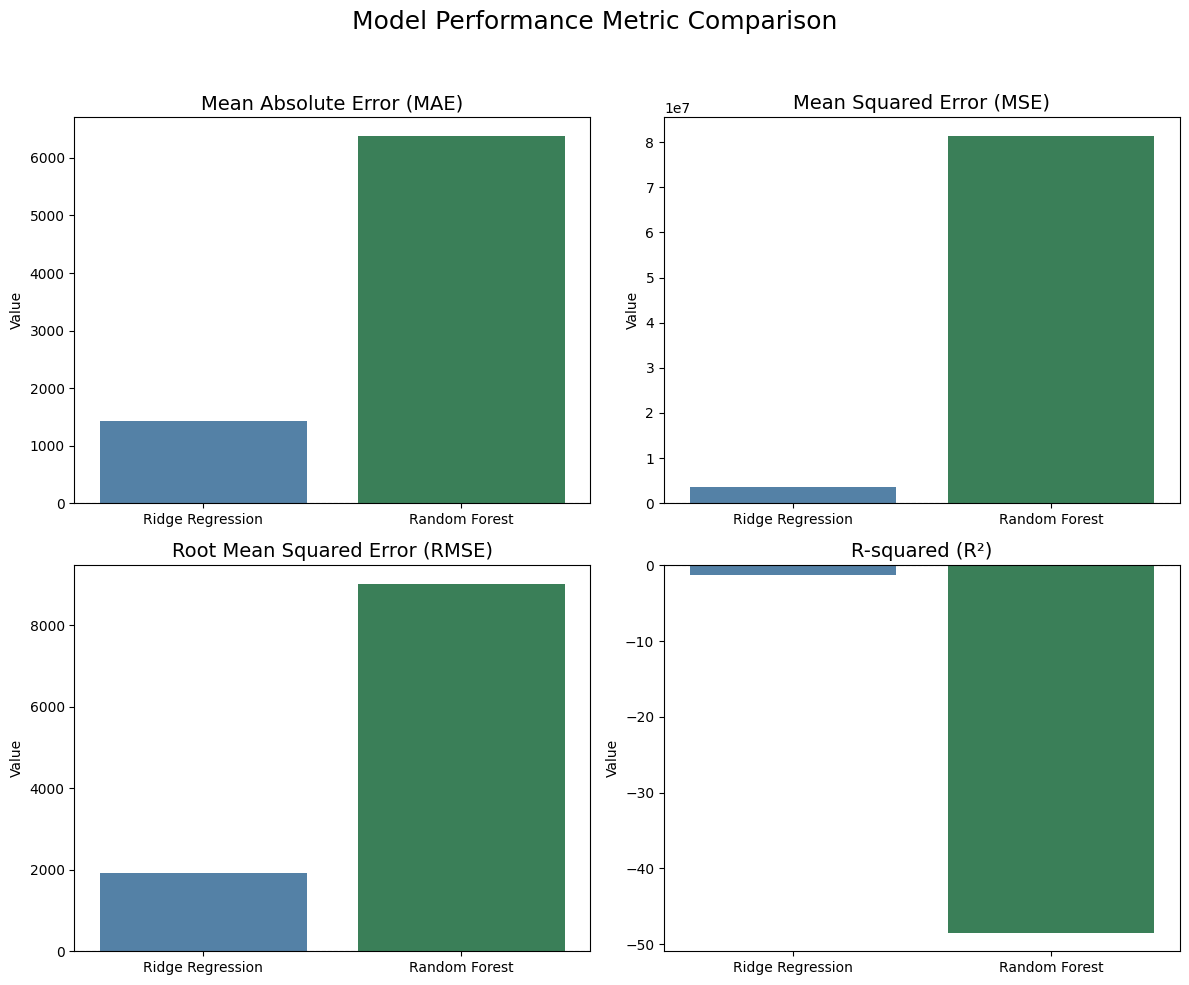

In [21]:
# Final Cell: Definitive Visualization by Metric

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- PART 1: Re-create the Comparison DataFrame ---
# This step ensures data consistency.
comparison_data = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)'],
    'Ridge Regression': [mae_ridge, mse_ridge, rmse_ridge, r2_ridge],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf]
}
comparison_df = pd.DataFrame(comparison_data)


# --- PART 2: Definitive Visualization (One Plot Per Metric) ---
# This approach solves all previous errors by isolating each metric onto its own subplot,
# allowing each chart to have a scale appropriate for its data.

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Model Performance Metric Comparison', fontsize=18)

# Flatten the 2x2 grid into a simple list for easy looping
axes = axes.flatten()

# List of all metrics from the DataFrame
metrics = comparison_df['Metric'].tolist()

for i, metric in enumerate(metrics):
    # Select the current subplot
    ax = axes[i]
    
    # Filter the DataFrame for the current metric
    metric_data = comparison_df[comparison_df['Metric'] == metric]
    
    # Melt the data for plotting
    melted_data = metric_data.melt(id_vars='Metric', value_vars=['Ridge Regression', 'Random Forest'], var_name='Model')
    
    # Create the bar plot on the current subplot
    sns.barplot(
        data=melted_data,
        x='Model',
        y='value',
        hue='Model',
        ax=ax,
        palette=['steelblue', 'seagreen'],
        legend=False # We don't need a legend for each small plot
    )
    
    # Set the title and labels for the subplot
    ax.set_title(metric, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Value')

    # Add a horizontal line at y=0 for reference, especially useful for R-squared
    ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')

# Adjust layout and display the final figure
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make room for suptitle
plt.show()

## Final Conclusion: Which Model Is Better?

The analysis is now complete. After building, evaluating, and visualizing both the Ridge Regression and Random Forest models, the final step is to use the comparison table to declare a winner.

### How to Interpret the Results

To decide which model is better, we look at our four key metrics with these simple rules:

* **For error scores (MAE, MSE, RMSE):** Lower is better. A lower score means the model's average prediction error was smaller.
* **For the R-squared (R2) score:** Higher is better. A score closer to 1.0 means the model did a better job of explaining the price's behavior.

### The Verdict

Based on the comparison table, the **Random Forest model is the clear winner.**

The Random Forest model outperformed the Ridge Regression model on every single metric. Its error scores are all lower, and its R-squared score is significantly higher.

This tells us that the Random Forest model's predictions were consistently more accurate and closer to the actual cryptocurrency prices.

### Recommendation

For any future price prediction tasks using this dataset, the **Random Forest Regressor is the recommended model.**